# plotting with pandas
A few examples of creating common types of plots using `pandas`' built-in support for `matplotlib`.

## Imports
Import the common modules used for pandas-based data analysis

In [284]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Line plots
The default plot type in `pandas` is the line plot.

In [285]:
# make a simple time series with dummy data - we will use random values for each day of the year 2021
ts = pd.Series(np.random.randn(365), index=pd.date_range("1/1/2021", periods=365), name='vals')
ts

2021-01-01    1.200472
2021-01-02   -0.039722
2021-01-03    1.186591
2021-01-04   -0.867229
2021-01-05    0.024980
                ...   
2021-12-27   -1.168292
2021-12-28    1.359370
2021-12-29    0.296037
2021-12-30   -2.088477
2021-12-31   -0.517228
Freq: D, Name: vals, Length: 365, dtype: float64

Create a simple line plot - the index of the Series will be used as the `x` axis, and the values will be plotting on the `y` axis.

<AxesSubplot:>

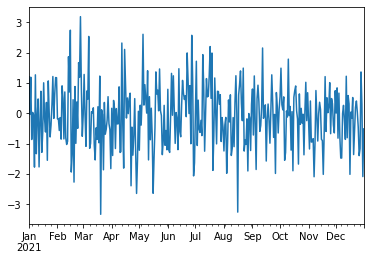

In [286]:
# defaults to line plot
ts.plot()

We can also easily plot the cumulative sum of all prior values at each date.

<AxesSubplot:>

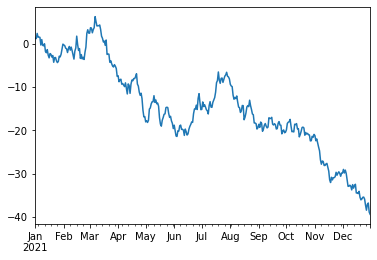

In [287]:
# calculate the cumulative sum of values up to each date
ts = ts.cumsum()
ts.plot()

## Histograms

In [288]:
# make a dataframe from the Series
df = ts.to_frame()
df.head()

,vals
2021-01-01,1.200472
2021-01-02,1.160751
2021-01-03,2.347341
2021-01-04,1.480112
2021-01-05,1.505092


In [289]:
# create a new index, which places the old index, the dates, into a regular column named 'index'
df = df.reset_index()
df

,index,vals
0,2021-01-01,1.200472
1,2021-01-02,1.160751
2,2021-01-03,2.347341
3,2021-01-04,1.480112
4,2021-01-05,1.505092
...,...,...
360,2021-12-27,-38.431407
361,2021-12-28,-37.072037
362,2021-12-29,-36.776000
363,2021-12-30,-38.864477


In [290]:
# rename the 'index' column to 'date'
df.rename(columns = {"index": "date"}, inplace=True)
df

,date,vals
0,2021-01-01,1.200472
1,2021-01-02,1.160751
2,2021-01-03,2.347341
3,2021-01-04,1.480112
4,2021-01-05,1.505092
...,...,...
360,2021-12-27,-38.431407
361,2021-12-28,-37.072037
362,2021-12-29,-36.776000
363,2021-12-30,-38.864477


In [291]:
# ensure the dates are in a date data type
df["date"] = df["date"].astype("datetime64")

In [292]:
# add a month field
df['month'] = pd.to_datetime(df['date']).dt.to_period('M')
df.sample(5)

,date,vals,month
149,2021-05-30,-18.397133,2021-05
238,2021-08-27,-18.310950,2021-08
191,2021-07-11,-14.639005,2021-07
293,2021-10-21,-21.135843,2021-10
133,2021-05-14,-13.717318,2021-05


In [293]:
# group rows by month and calculate the sum of the values in each month
g = df.groupby(df['date'].dt.month.rename('month')).agg({'sum'})
g

,vals
,sum
month,
1,-46.147008
2,-32.073613
3,0.431926
4,-304.790452
5,-494.883676
6,-544.841946
7,-345.610412
8,-457.236758


<AxesSubplot:xlabel='month'>

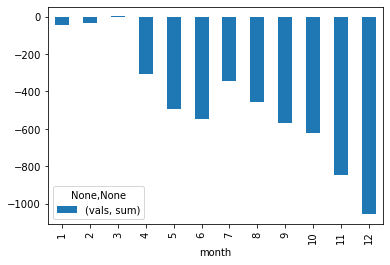

In [294]:
#plot the data
g.plot.bar(y=['vals']) # the index will serve as the x axis, by default

## Data set
We will use the NYC jobs data set, from the NYC Open Data initiative.

In [295]:
# open data about NYC jobs from https://data.cityofnewyork.us/City-Government/NYC-Jobs/kpav-sd4t
df = pd.read_csv('./NYC_Jobs.csv')
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
121,403522,BUSINESS INTEGRITY COMMISSION,External,2,Agency Attorney,AGENCY ATTORNEY,Non-Competitive-5,30087,01,"Legal Affairs Public Safety, Inspections, & En...",...,NaN,City employees: https://a127-ess.nyc.gov/psp/p...,NaN,NaN,NaN,New York City residency is generally required ...,08/07/2019,NaN,08/07/2019,04/13/2021
119,460912,DEPT OF ENVIRONMENT PROTECTION,Internal,2,2021-BWSO-004-Cross-Connections & Permitting I...,SUMMER COLLEGE INTERN,Non-Competitive-5,10234,00,"Engineering, Architecture, & Planning",...,Please attach requested documents (writing sam...,To Apply click the âApply Nowâ button DEP...,35 hours per week,This position is located at 96-05 Horace Hardi...,NaN,New York City residency is generally required ...,04/09/2021,NaN,04/09/2021,04/13/2021
227,458950,CONSUMER AFFAIRS,External,1,Investigator,CONFIDENTIAL EXAMINER,Exempt-4,13224,00,Legal Affairs,...,NaN,For Non-City/External Candidates: Visit the Ex...,NaN,NaN,NaN,New York City residency is generally required ...,03/02/2021,01-MAY-2021,03/02/2021,04/13/2021


In [296]:
# let's limit to only annual jobs
df = df[ df['Salary Frequency'] == 'Annual' ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
819,266529,LAW DEPARTMENT,External,1,Student Legal Specialist,STUDENT LEGAL SPECIALIST,Pending Classification-2,05072,00,Communications & Intergovernmental Affairs,...,Must currently be enrolled in a law school as ...,Please click the Apply Now button.,Monday through Friday 9am - 5pm,NaN,NaN,New York City residency is generally required ...,10/13/2016,NaN,10/13/2016,04/13/2021
1069,460724,HOUSING PRESERVATION & DVLPMNT,External,1,Assistant Commissioner for the Division of Inc...,ADMINISTRATIVE PROJECT DIRECTO,Non-Competitive-5,95566,M4,"Finance, Accounting, & Procurement",...,NaN,Apply online,NaN,100 Gold Street,NaN,New York City residency is generally required ...,04/02/2021,02-MAY-2021,04/02/2021,04/13/2021
536,460837,NYC POLICE PENSION FUND,External,2,Software Implementation Functional Lead,COMPUTER PROGRAMMER ANALYST,Competitive-1,13651,01,"Technology, Data & Innovation",...,NOTE: This position is open to qualified perso...,CITY EMPLOYEES: Employee Self Service (ESS). w...,NaN,NaN,NaN,New York City Residency is not required for th...,04/07/2021,20-APR-2021,04/09/2021,04/13/2021


In [297]:
# let's limit to only jobs that could pay more than 80k
df = df[ df['Salary Range To'] > 100000 ]
df.sample(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
643,459613,DEPT OF INFO TECH & TELECOMM,External,1,Senior Director of the Citywide Service Desk,TELECOMMUNICATION MANAGER,Competitive-1,82984,M3,"Technology, Data & Innovation",...,NaN,Special Note: Taking and passing civil service...,Day - Due to the necessary technical managemen...,"Brooklyn, NY",NaN,New York City residency is generally required ...,03/22/2021,NaN,03/22/2021,04/13/2021
976,458102,DEPT OF INFO TECH & TELECOMM,Internal,1,Senior Director of Application Architecture,SENIOR IT ARCHITECT,Non-Competitive-5,95711,00,"Technology, Data & Innovation",...,NaN,For DoITT Employees Only * Interested applica...,Day - Due to the necessary technical support d...,"Brooklyn, NY",NaN,New York City Residency is not required for th...,03/26/2021,NaN,03/29/2021,04/13/2021
534,387572,DEPARTMENT OF CORRECTION,External,1,DIRECTOR OF DATA ANALYTICS AND RESEARCH,CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,4A,"Policy, Research & Analysis",...,Appointments to this position are subject to a...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,03/22/2019,NaN,02/10/2020,04/13/2021


In [298]:
# group jobs at each agency
g = df.groupby(df['Agency']).agg({'sum'})
g.sample(3)

,Job ID,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,To Apply,Recruitment Contact,Residency Requirement,Posting Date,Posting Updated,Process Date
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
Agency,,,,,,,,,,,,,,,,,,,,
ADMIN FOR CHILDREN'S SVCS,4247377,ExternalExternalInternalExternalInternalIntern...,15,"Juvenile Justice TrainerDeputy Commissioner, C...",ADMINISTRATIVE DIRECTOR OF RESDEPUTY DIRECTOR ...,Competitive-1Non-Competitive-5Non-Competitive-...,1001652485524851002D10026100162174421744956002...,M1M7M700M4M14A4AM24A0000,925828.0,1817262.0,AnnualAnnualAnnualAnnualAnnualAnnualAnnualAnnu...,"492 First Avenue, New York, Ny66 John Street, ...",Satterwhite Academy (DPPM)Child and Family Wel...,Reporting to the Training Supervisor of Juveni...,Click on the Apply Now Button.Click on Apply N...,0.0,New York City residency is generally required ...,07/08/201602/04/202002/04/202004/04/201608/20/...,01/09/201802/04/202002/04/202007/05/201608/20/...,04/13/202104/13/202104/13/202104/13/202104/13/...
TAXI & LIMOUSINE COMMISSION,1796028,InternalExternalExternalInternal,4,Deputy Commissioner of PolicyGeneral Counsel/D...,EXECUTIVE AGENCY COUNSELEXECUTIVE AGENCY COUNS...,Non-Competitive-5Non-Competitive-5Non-Competit...,95005950059500595005,M7M6M7M6,505660.0,926398.0,AnnualAnnualAnnualAnnual,"33 Beaver St, New York Ny33 Beaver St, New Yor...",Exec. Office PolicyLegal AffairsExec. Office P...,The New York City Taxi and Limousine Commissio...,"Click, APPLY NOW Current city employees must a...",0.0,New York City residency is generally required ...,01/06/202107/13/202001/06/202107/13/2020,01/06/202107/13/202001/06/202107/13/2020,04/13/202104/13/202104/13/202104/13/2021
DEPARTMENT OF TRANSPORTATION,3170119,ExternalInternalInternalInternalInternalIntern...,9,Deputy General CounselDirector of Expense Budg...,EXECUTIVE AGENCY COUNSELADMINISTRATIVE STAFF A...,Non-Competitive-5Competitive-1Competitive-1Com...,95005100261005A202151002D950051002C,M5M2000300M503,521775.0,1212328.0,AnnualAnnualAnnualAnnualAnnualAnnualAnnual,55 Water St Ny Ny55 Water St Ny Ny55 Water St ...,Legal AffairsFinancial Management &AnalysisTPM...,Department of Transportationâs Division of L...,All resumes are to be submitted electronically...,0.0,New York City residency is generally required ...,08/21/202009/30/202004/08/202104/03/202104/08/...,08/21/202010/05/202004/09/202104/09/202104/09/...,04/13/202104/13/202104/13/202104/13/202104/13/...


<AxesSubplot:ylabel='Agency'>

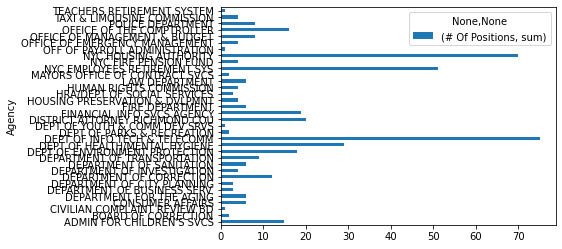

In [299]:
# plot the jobs at each agency
g.plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

<AxesSubplot:ylabel='Agency'>

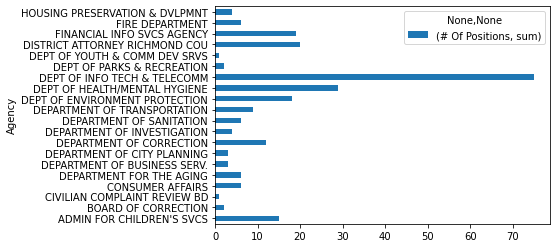

In [303]:
# perhaps limit to just the first 20 agencies!
g[ : 20].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

<AxesSubplot:ylabel='Agency'>

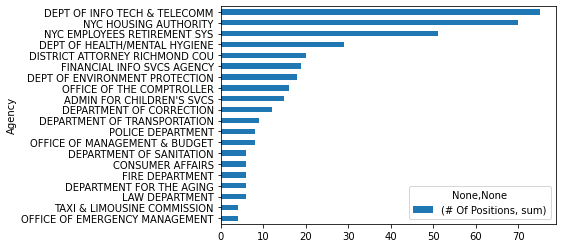

In [301]:
# plot the top agencies by number of positions
g2 = g.sort_values( ('# Of Positions', 'sum'), ascending=False )
g2[ : 20][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

<AxesSubplot:ylabel='Agency'>

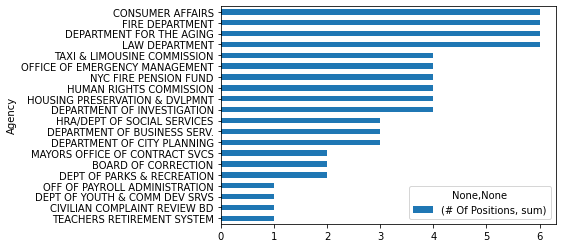

In [304]:
# plot the bottom agencies by number of positions
g2[-20 : ][::-1].plot.barh(y=['# Of Positions']) # the index will serve as the x axis, by default

## Pie charts

<AxesSubplot:ylabel='sum'>

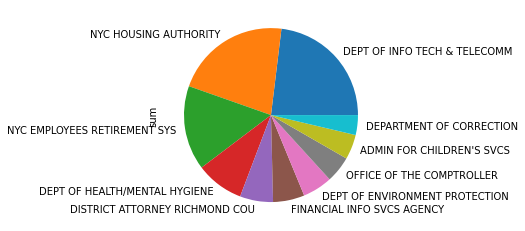

In [316]:
# pie chart of the top 10 agencies, by number of positions over 100k
g2[ : 10].plot.pie(y='# Of Positions', legend=False)